In [22]:
import random
random.seed(122)

import csv
import pandas as pd
import numpy as np
import xgboost as xgb
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
from sklearn.model_selection import train_test_split

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import DMatrix
from matplotlib import pyplot
from math import *

with open('ml_features_201710.csv','rb') as data:
    features = pd.read_csv(data)
    
with open('crg123.csv','rb') as data2:
    features2 = pd.read_csv(data2)
      
   
start = time.time()  

features=features.rename(columns = {'interact':'label'})
features2=features2.rename(columns = {'interact':'label'})

#convert labels to boolean values
features.loc[features['label']=='YES','label']=1
features.loc[features['label']=='NO','label']=0

features2.loc[features2['label']=='YES','label']=1
features2.loc[features2['label']=='NO','label']=0

features = features[features.columns.drop(list(features.filter(regex='Host')))]
features2 = features2[features2.columns.drop(list(features2.filter(regex='Host')))]


#shuffle dataframe
features = features.sample(frac=1).reset_index(drop=True)
features2 = features2.sample(frac=1).reset_index(drop=True)

# Labels are the values we want to predict
train_labels = np.array(features['label'])
test_labels = np.array(features2['label'])
# Remove the labels from the features
# axis 1 refers to the columns
train_features= features.drop('label', axis = 1)
test_features= features2.drop('label', axis = 1)
# Saving feature names for later use
feature_list = list(train_features.columns)
# Convert to numpy array
train_features = np.array(train_features)
test_features = np.array(test_features)

#Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
#train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.30, random_state = 42)
end = time.time()

print(round(end - start,2)," seconds elapsed")

print(feature_list)


(0.09, ' seconds elapsed')
['Pathogen_Ala', 'Pathogen_Arg', 'Pathogen_Asn', 'Pathogen_Asp', 'Pathogen_Cys', 'Pathogen_Gln', 'Pathogen_Glu', 'Pathogen_Gly', 'Pathogen_His', 'Pathogen_Ile', 'Pathogen_Leu', 'Pathogen_Lys', 'Pathogen_Met', 'Pathogen_Phe', 'Pathogen_Pro', 'Pathogen_Ser', 'Pathogen_Thr', 'Pathogen_Trp', 'Pathogen_Tyr', 'Pathogen_Val', 'GO_Similarity_Score']


Pathogen_Ala


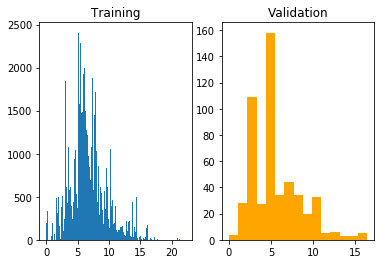


Pathogen_Arg


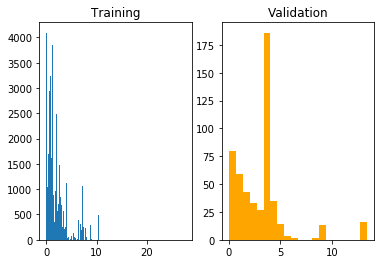


Pathogen_Asn


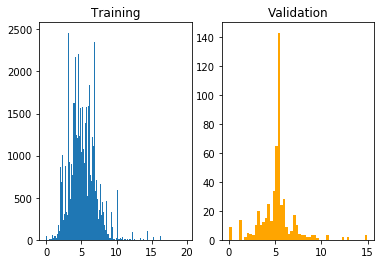


Pathogen_Asp


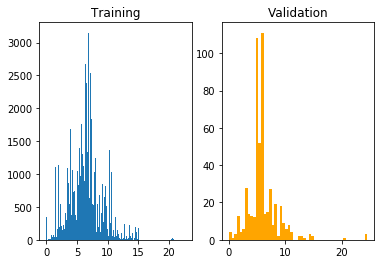


Pathogen_Cys


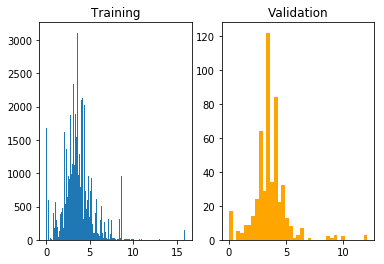


Pathogen_Gln


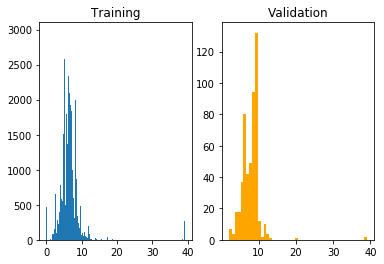


Pathogen_Glu


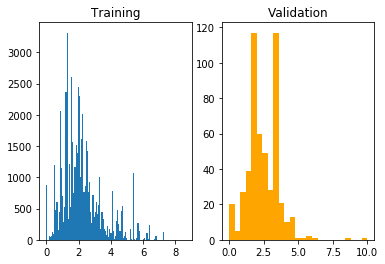


Pathogen_Gly


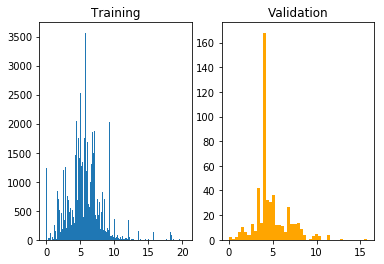


Pathogen_His


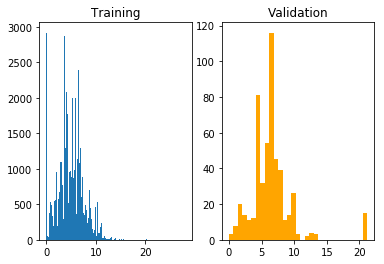


Pathogen_Ile


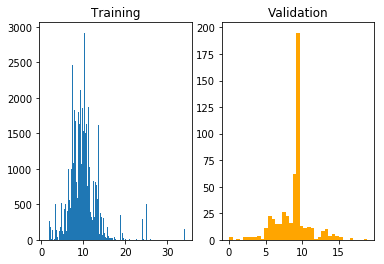


Pathogen_Leu


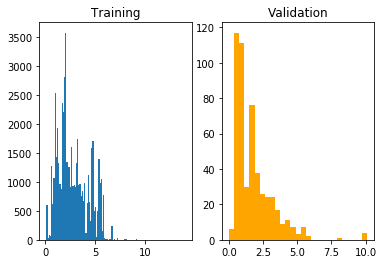


Pathogen_Lys


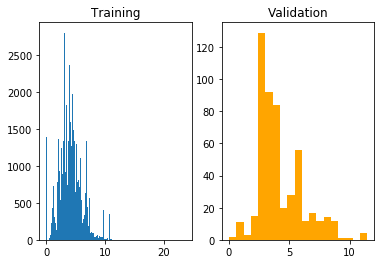


Pathogen_Met


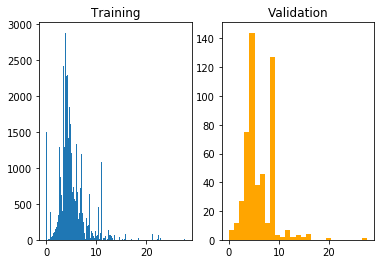


Pathogen_Phe


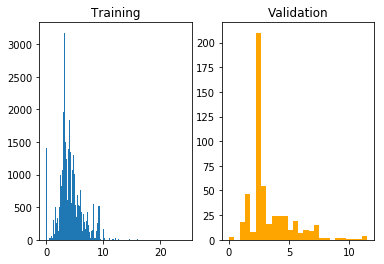


Pathogen_Pro


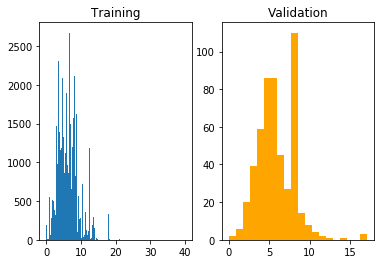


Pathogen_Ser


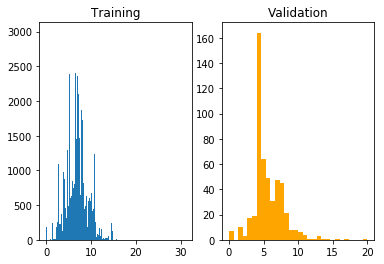


Pathogen_Thr


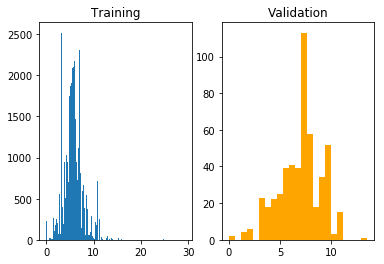


Pathogen_Trp


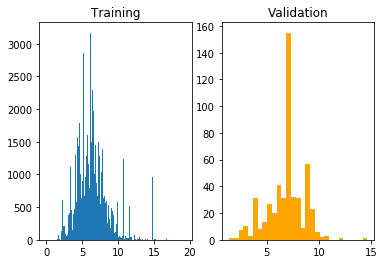


Pathogen_Tyr


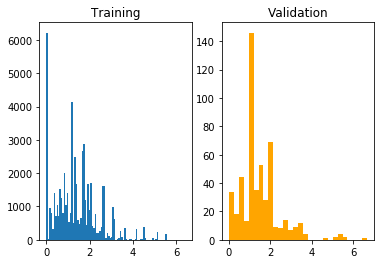


Pathogen_Val


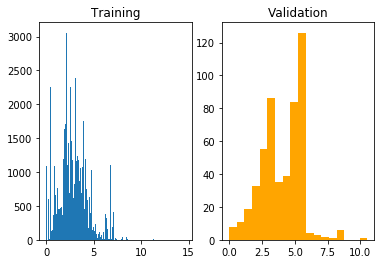


Host_Ala


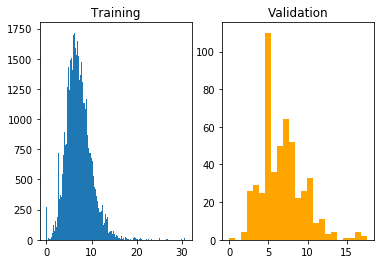


Host_Arg


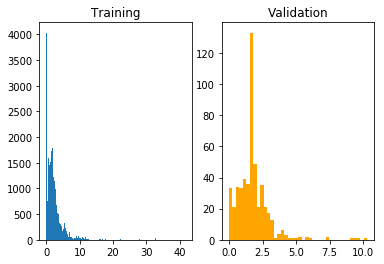


Host_Asn


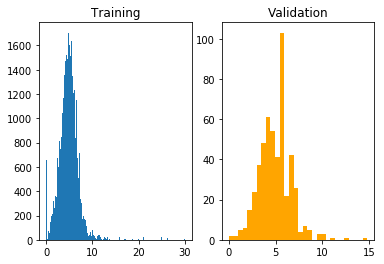


Host_Asp


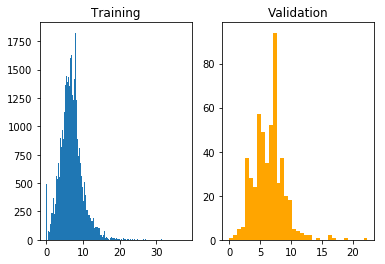


Host_Cys


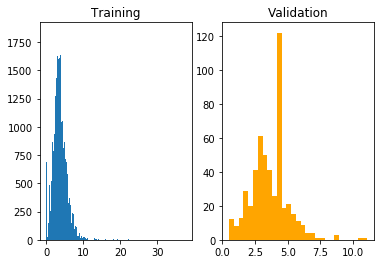


Host_Gln


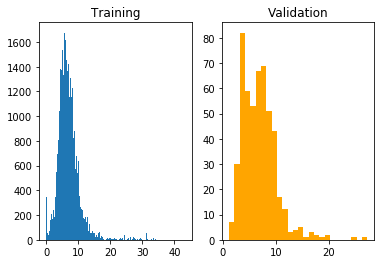


Host_Glu


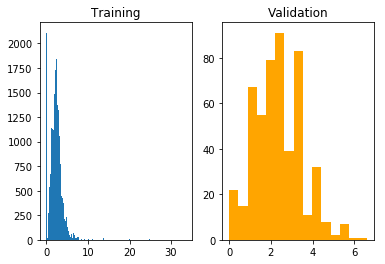


Host_Gly


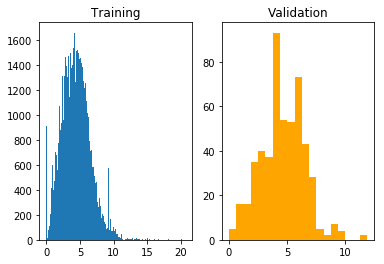


Host_His


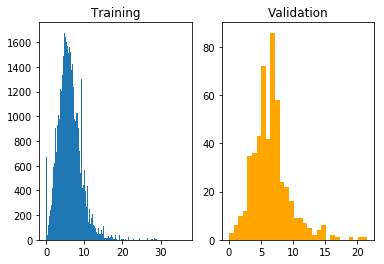


Host_Ile


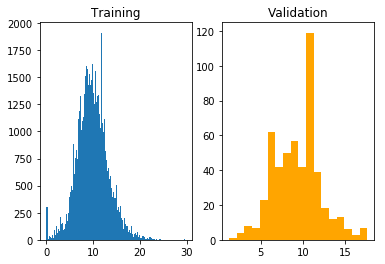


Host_Leu


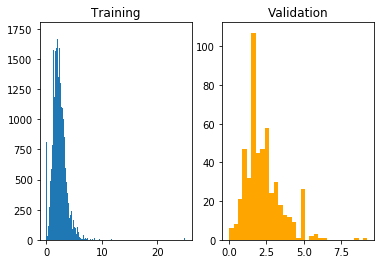


Host_Lys


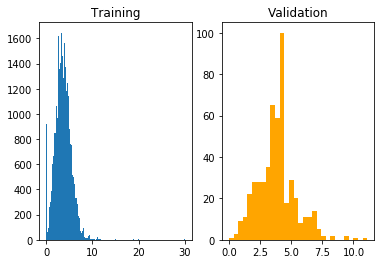


Host_Met


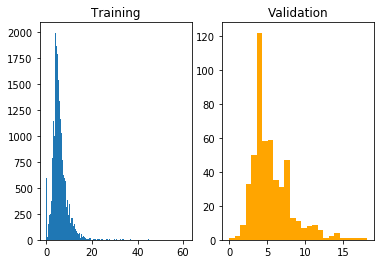


Host_Phe


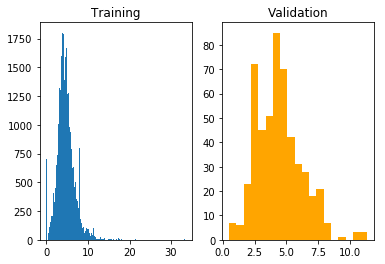


Host_Pro


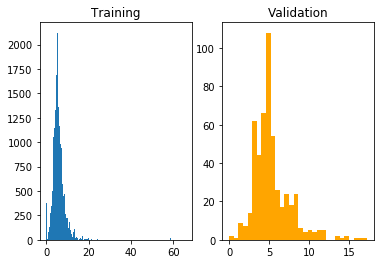


Host_Ser


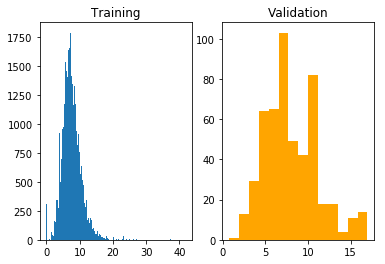


Host_Thr


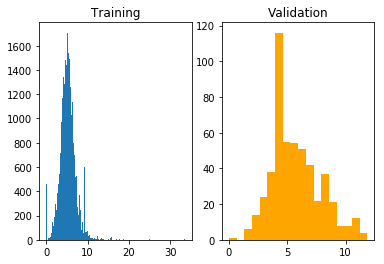


Host_Trp


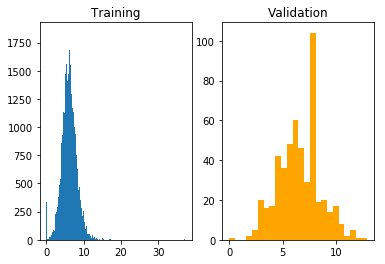


Host_Tyr


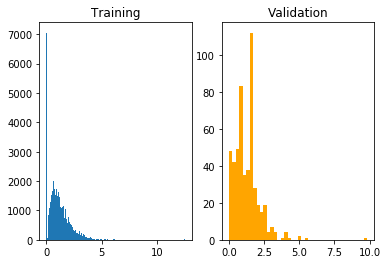


Host_Val


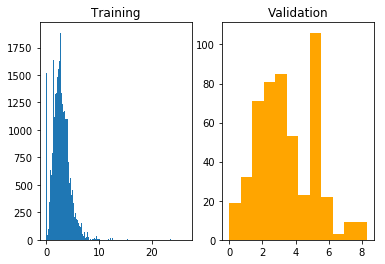


GO_Similarity_Score


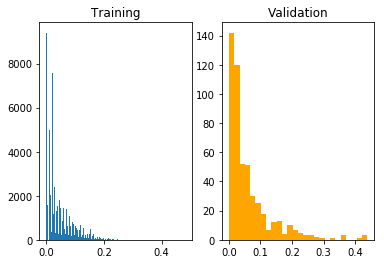

In [6]:
#don't use this.  If you do, see this link https://stackoverflow.com/questions/36786722/how-to-display-full-output-in-jupyter-not-only-last-result
#seems last and all values got switched someone, even after kernal restart
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all" 

#Show histogram of each variable 
for myFeature in feature_list:
    print(myFeature)
    pyplot.subplot(1,2,1)
    pyplot.hist(features[myFeature],'auto' )
    pyplot.title("Training")
    pyplot.subplot(1,2,2)
    pyplot.title("Validation")
    pyplot.hist(features2[myFeature],'auto',color='orange')
    pyplot.show()
    print



(11.9, ' seconds elapsed')
[[ 74 210]
 [103 126]]
              precision    recall  f1-score   support

           0       0.42      0.26      0.32       284
           1       0.38      0.55      0.45       229

   micro avg       0.39      0.39      0.39       513
   macro avg       0.40      0.41      0.38       513
weighted avg       0.40      0.39      0.38       513

('Accuracy:', 0.3898635477582846)


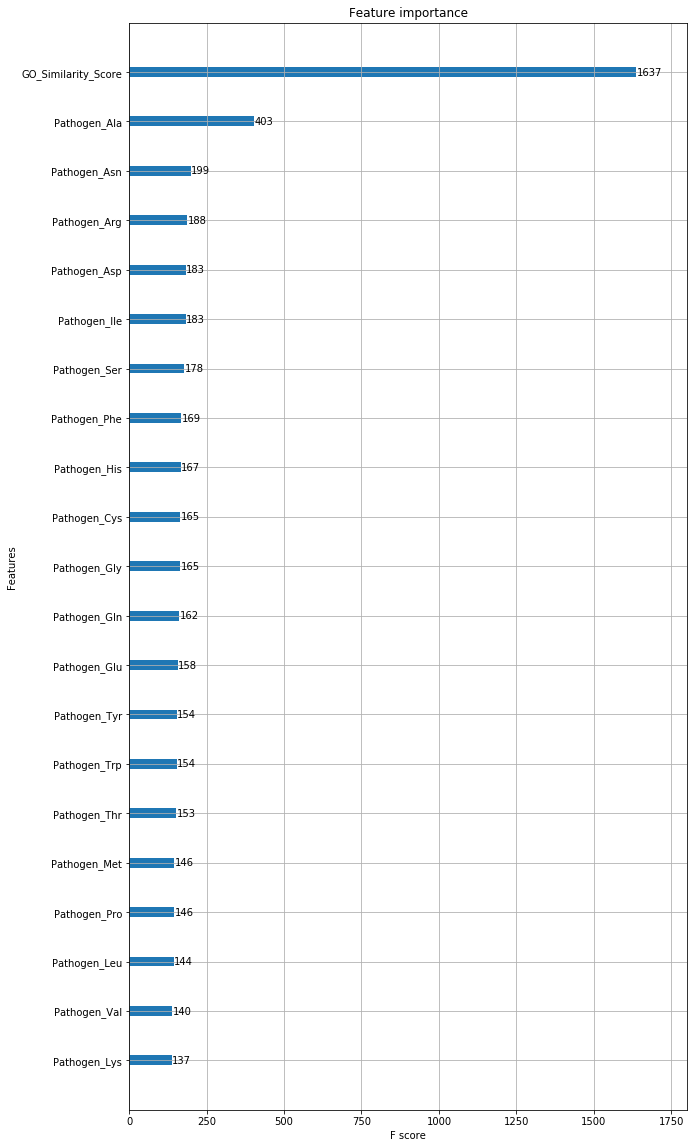

In [23]:
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param = {'silent':1}
num_round = 100
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

(23.63, ' seconds elapsed')
[[ 73 211]
 [110 119]]
              precision    recall  f1-score   support

           0       0.40      0.26      0.31       284
           1       0.36      0.52      0.43       229

   micro avg       0.37      0.37      0.37       513
   macro avg       0.38      0.39      0.37       513
weighted avg       0.38      0.37      0.36       513

('Accuracy:', 0.3742690058479532)


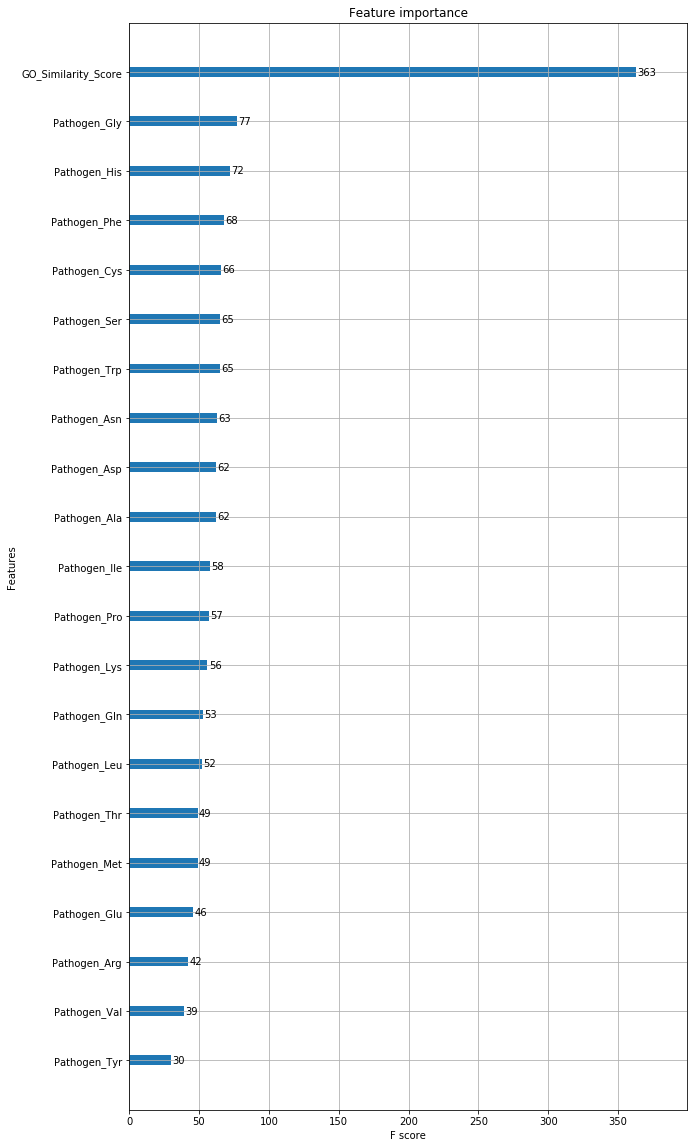

In [24]:
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
#param = {'silent':1}
num_round = 500
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance - 
#code refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
# reference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

In [25]:
#random forest.  Source Link: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 and https://www.datacamp.com/community/tutorials/random-forests-classifier-python
start = time.time() 

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Instantiate model with 100 decision trees 
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);


# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

#calcualte the accuracy
accuracy = sum(predictions.round() == test_labels)/test_labels.size
# Print out the Accuracy
print('Accuracy:', 100*round(accuracy, 4), '%.')

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
for pair in feature_importances:
    print("Variable: {:20} Importance: {}".format(*pair))



('Accuracy:', 0.0, '%.')
(79.94, ' seconds elapsed')
[[110 174]
 [139  90]]
              precision    recall  f1-score   support

           0       0.44      0.39      0.41       284
           1       0.34      0.39      0.37       229

   micro avg       0.39      0.39      0.39       513
   macro avg       0.39      0.39      0.39       513
weighted avg       0.40      0.39      0.39       513

('Accuracy:', 0.3898635477582846)
Variable: GO_Similarity_Score  Importance: 0.43
Variable: Pathogen_Ala         Importance: 0.05
Variable: Pathogen_Asn         Importance: 0.04
Variable: Pathogen_Gly         Importance: 0.04
Variable: Pathogen_Leu         Importance: 0.04
Variable: Pathogen_Ser         Importance: 0.04
Variable: Pathogen_Gln         Importance: 0.03
Variable: Pathogen_Ile         Importance: 0.03
Variable: Pathogen_Pro         Importance: 0.03
Variable: Pathogen_Thr         Importance: 0.03
Variable: Pathogen_Trp         Importance: 0.03
Variable: Pathogen_Val         Impo

In [27]:
#re-import data without columns that have less than 0.02 from the above feature importance print out

#random forest.  Source Link: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 and https://www.datacamp.com/community/tutorials/random-forests-classifier-python

with open('ml_features_201710.csv','rb') as data:
    features = pd.read_csv(data)
      
with open('crg123.csv','rb') as data2:
    features2 = pd.read_csv(data2)
    
start = time.time()  

features=features.rename(columns = {'interact':'label'})
features2=features2.rename(columns = {'interact':'label'})

#remove columns 
features = features[features.columns.drop(list(features.filter(regex='Host|GO_S')))]
features2 = features2[features2.columns.drop(list(features2.filter(regex='Host|GO_S')))]

#convert labels to boolean values
features.loc[features['label']=='YES','label']=1
features.loc[features['label']=='NO','label']=0

features2.loc[features2['label']=='YES','label']=1
features2.loc[features2['label']=='NO','label']=0

#shuffle dataframe
features = features.sample(frac=1).reset_index(drop=True)
features2 = features2.sample(frac=1).reset_index(drop=True)

# Labels are the values we want to predict
train_labels = np.array(features['label'])
test_labels = np.array(features2['label'])
# Remove the labels from the features
# axis 1 refers to the columns
train_features= features.drop('label', axis = 1)
test_features= features2.drop('label', axis = 1)
# Saving feature names for later use
feature_list = list(train_features.columns)
# Convert to numpy array
train_features = np.array(train_features)
test_features = np.array(test_features)

start = time.time() 




# Instantiate model with 100 decision trees  
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);


# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

end = time.time()

print(str(round(end - start,2))+" seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:"+str(metrics.accuracy_score(test_labels,predictions.round())))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 

for pair in feature_importances:
    print("Variable: {:20} Importance: {}".format(*pair))






70.29 seconds elapsed
[[  4 280]
 [  0 229]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.03       284
           1       0.45      1.00      0.62       229

   micro avg       0.45      0.45      0.45       513
   macro avg       0.72      0.51      0.32       513
weighted avg       0.75      0.45      0.29       513

Accuracy:0.45419103313840153
Variable: Pathogen_Trp         Importance: 0.12
Variable: Pathogen_Asp         Importance: 0.08
Variable: Pathogen_Gly         Importance: 0.07
Variable: Pathogen_Leu         Importance: 0.07
Variable: Pathogen_Asn         Importance: 0.06
Variable: Pathogen_Thr         Importance: 0.06
Variable: Pathogen_Tyr         Importance: 0.06
Variable: Pathogen_Ser         Importance: 0.05
Variable: Pathogen_Val         Importance: 0.05
Variable: Pathogen_Ala         Importance: 0.04
Variable: Pathogen_Cys         Importance: 0.04
Variable: Pathogen_Glu         Importance: 0.04
Variable: Pathogen_His 

(51.21, ' seconds elapsed')
[[  3 278   3]
 [  0 229   0]
 [  0   0   0]]
              precision    recall  f1-score   support

         0.0       1.00      0.01      0.02       284
         1.0       0.45      1.00      0.62       229
         2.0       0.00      0.00      0.00         0

   micro avg       0.45      0.45      0.45       513
   macro avg       0.48      0.34      0.21       513
weighted avg       0.76      0.45      0.29       513

('Accuracy:', 0.4522417153996101)


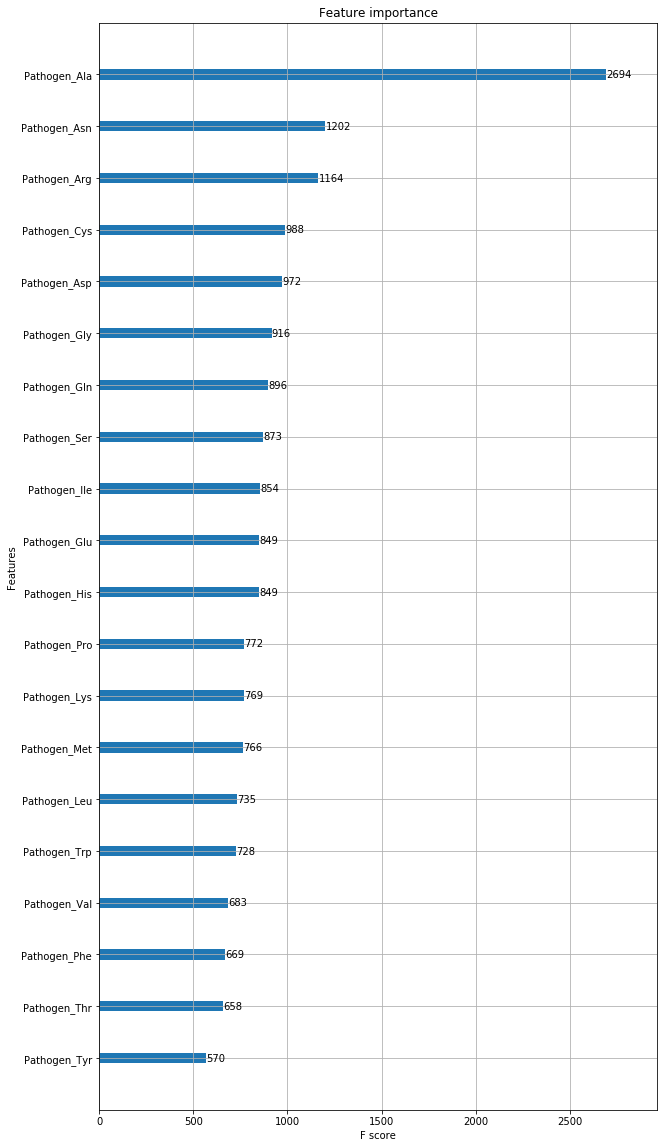

In [28]:
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param = {'silent':1}
num_round = 500
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

In [9]:


#summary stats
print("Training dataset is first occurence, validation is second occurence\n")

for myFeature in feature_list:
    print(features[myFeature].describe())
    print
    print(features2[myFeature].describe())
    print
    
    

    


Training dataset is first occurence, validation is second occurence

count    53702.000000
mean         6.647807
std          2.925716
min          0.000000
25%          5.116000
50%          6.250000
75%          7.992000
max         22.093000
Name: Pathogen_Ala, dtype: float64

count    513.000000
mean       5.516632
std        2.992890
min        0.000000
25%        2.381000
50%        5.172000
75%        6.912000
max       16.456000
Name: Pathogen_Ala, dtype: float64

count    53702.000000
mean         2.258981
std          2.216174
min          0.000000
25%          0.806000
50%          1.431000
75%          3.014000
max         27.536000
Name: Pathogen_Arg, dtype: float64

count    513.000000
mean       3.072491
std        2.619231
min        0.000000
25%        1.210000
50%        3.419000
75%        3.941000
max       13.441000
Name: Pathogen_Arg, dtype: float64

count    53702.000000
mean         5.152791
std          2.076523
min          0.000000
25%          3.821000
50%  

count    53702.000000
mean         2.330362
std          1.219062
min          0.000000
25%          1.545000
50%          2.195000
75%          2.927000
max         25.000000
Name: Host_Leu, dtype: float64

count    513.000000
mean       2.299041
std        1.251721
min        0.000000
25%        1.577000
50%        2.024000
75%        2.789000
max        9.268000
Name: Host_Leu, dtype: float64

count    53702.000000
mean         3.659129
std          1.675522
min          0.000000
25%          2.582250
50%          3.571000
75%          4.641750
max         30.000000
Name: Host_Lys, dtype: float64

count    513.000000
mean       3.842404
std        1.533840
min        0.000000
25%        2.927000
50%        3.810000
75%        4.416000
max       11.111000
Name: Host_Lys, dtype: float64

count    53702.000000
mean         5.890446
std          3.263302
min          0.000000
25%          3.942000
50%          5.263000
75%          7.153500
max         60.799000
Name: Host_Met, dtype: f

(5.44, ' seconds elapsed')
[[ 98 186]
 [ 58 171]]
              precision    recall  f1-score   support

           0       0.63      0.35      0.45       284
           1       0.48      0.75      0.58       229

   micro avg       0.52      0.52      0.52       513
   macro avg       0.55      0.55      0.51       513
weighted avg       0.56      0.52      0.51       513

('Accuracy:', 0.5243664717348928)


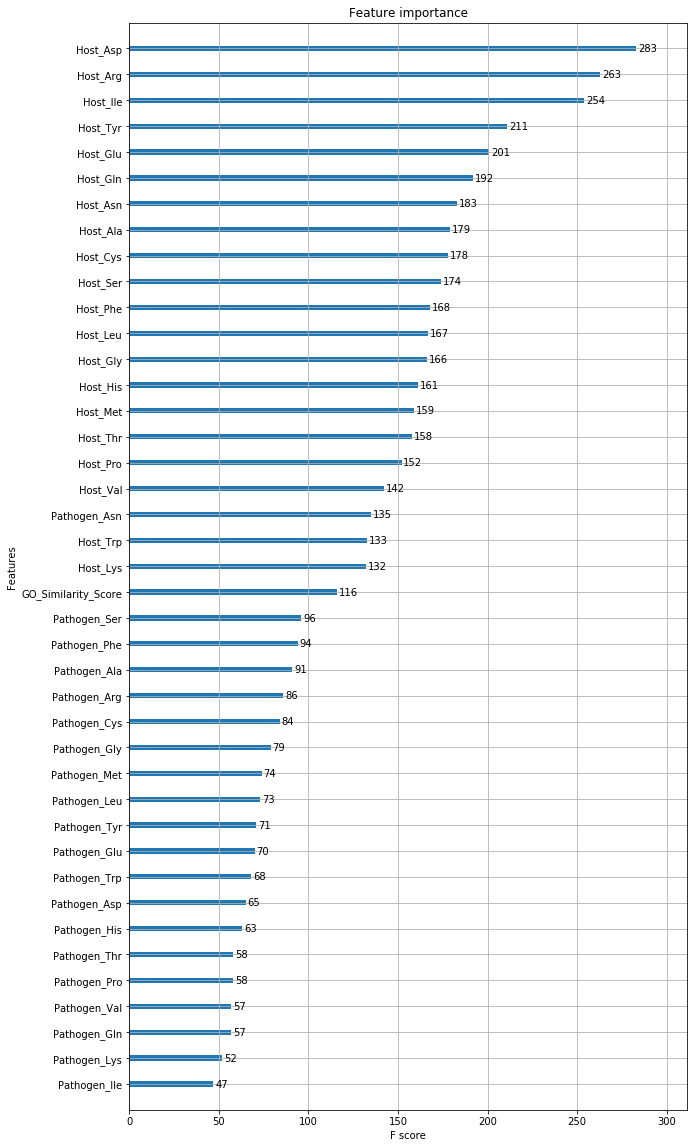

In [18]:
#overfitting check(s)
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':0.1, 'silent':1, 'objective':'binary:logistic' }
param = {'max_depth':10,'objective':'reg:logistic', 'eta':0.1, 'silent':1 }
#param = {'silent':1}
num_round = 10
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance - 
#code refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
# reference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

In [29]:
#Let's do normlization


#re-import data without columns that have less than 0.02 from the above feature importance print out

#random forest.  Source Link: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 and https://www.datacamp.com/community/tutorials/random-forests-classifier-python

with open('ml_features_201710.csv','rb') as data:
    features = pd.read_csv(data)
      
with open('crg123.csv','rb') as data2:
    features2 = pd.read_csv(data2)
    
start = time.time()  

features=features.rename(columns = {'interact':'label'})
features2=features2.rename(columns = {'interact':'label'})

#remove columns 
features = features[features.columns.drop(list(features.filter(regex='Host|GO_S')))]
features2 = features2[features2.columns.drop(list(features2.filter(regex='Host|GO_S')))]

#convert labels to boolean values
features.loc[features['label']=='YES','label']=1
features.loc[features['label']=='NO','label']=0

features2.loc[features2['label']=='YES','label']=1
features2.loc[features2['label']=='NO','label']=0

#shuffle dataframe
features = features.sample(frac=1).reset_index(drop=True)
features2 = features2.sample(frac=1).reset_index(drop=True)

# Labels are the values we want to predict
train_labels = np.array(features['label'])
test_labels = np.array(features2['label'])
# Remove the labels from the features
# axis 1 refers to the columns
train_features= features.drop('label', axis = 1)
test_features= features2.drop('label', axis = 1)

#normalize
train_features=(train_features-train_features.mean())/train_features.std()
test_features=(test_features-test_features.mean())/test_features.std()


# Saving feature names for later use
feature_list = list(train_features.columns)
# Convert to numpy array
train_features = np.array(train_features)
test_features = np.array(test_features)

start = time.time() 




# Instantiate model with 100 decision trees  
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);


# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

end = time.time()

print(str(round(end - start,2))+" seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:"+str(metrics.accuracy_score(test_labels,predictions.round())))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 

for pair in feature_importances:
    print("Variable: {:20} Importance: {}".format(*pair))









69.6 seconds elapsed
[[  1 283]
 [  0 229]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       284
           1       0.45      1.00      0.62       229

   micro avg       0.45      0.45      0.45       513
   macro avg       0.72      0.50      0.31       513
weighted avg       0.75      0.45      0.28       513

Accuracy:0.44834307992202727
Variable: Pathogen_Trp         Importance: 0.12
Variable: Pathogen_Asp         Importance: 0.08
Variable: Pathogen_Gly         Importance: 0.08
Variable: Pathogen_Asn         Importance: 0.06
Variable: Pathogen_Leu         Importance: 0.06
Variable: Pathogen_Thr         Importance: 0.06
Variable: Pathogen_Tyr         Importance: 0.06
Variable: Pathogen_Glu         Importance: 0.05
Variable: Pathogen_His         Importance: 0.05
Variable: Pathogen_Ser         Importance: 0.05
Variable: Pathogen_Val         Importance: 0.05
Variable: Pathogen_Ala         Importance: 0.04
Variable: Pathogen_Cys  

(53.88, ' seconds elapsed')
[[  1 282   1]
 [  0 229   0]
 [  0   0   0]]
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.01       284
         1.0       0.45      1.00      0.62       229
         2.0       0.00      0.00      0.00         0

   micro avg       0.45      0.45      0.45       513
   macro avg       0.48      0.33      0.21       513
weighted avg       0.75      0.45      0.28       513

('Accuracy:', 0.44834307992202727)


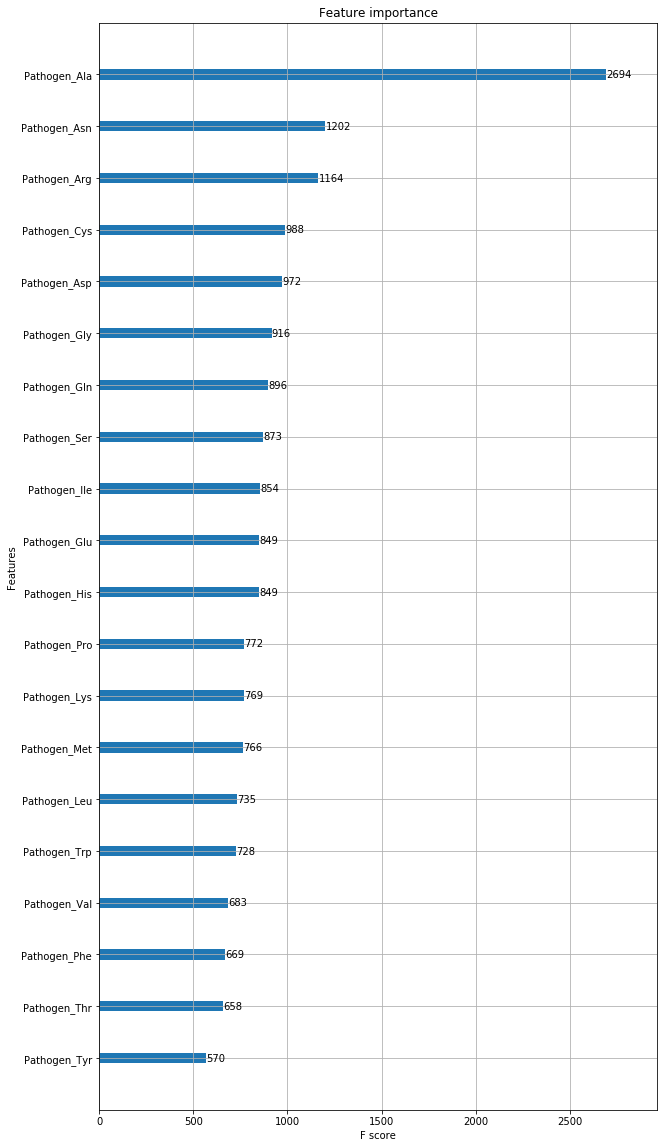

In [30]:
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param = {'silent':1}
num_round = 500
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

In [31]:
#Let's try getting rid of the pathogen
#Let's do normlization


#re-import data without columns that have less than 0.02 from the above feature importance print out

#random forest.  Source Link: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 and https://www.datacamp.com/community/tutorials/random-forests-classifier-python

with open('ml_features_201710.csv','rb') as data:
    features = pd.read_csv(data)
      
with open('crg123.csv','rb') as data2:
    features2 = pd.read_csv(data2)
    
start = time.time()  

features=features.rename(columns = {'interact':'label'})
features2=features2.rename(columns = {'interact':'label'})

#remove columns 
features = features[features.columns.drop(list(features.filter(regex='Pathogen')))]
features2 = features2[features2.columns.drop(list(features2.filter(regex='Pathogen')))]

#convert labels to boolean values
features.loc[features['label']=='YES','label']=1
features.loc[features['label']=='NO','label']=0

features2.loc[features2['label']=='YES','label']=1
features2.loc[features2['label']=='NO','label']=0

#shuffle dataframe
features = features.sample(frac=1).reset_index(drop=True)
features2 = features2.sample(frac=1).reset_index(drop=True)

# Labels are the values we want to predict
train_labels = np.array(features['label'])
test_labels = np.array(features2['label'])
# Remove the labels from the features
# axis 1 refers to the columns
train_features= features.drop('label', axis = 1)
test_features= features2.drop('label', axis = 1)

#normalize
train_features=(train_features-train_features.mean())/train_features.std()
test_features=(test_features-test_features.mean())/test_features.std()


# Saving feature names for later use
feature_list = list(train_features.columns)
# Convert to numpy array
train_features = np.array(train_features)
test_features = np.array(test_features)

start = time.time() 




# Instantiate model with 100 decision trees  
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);


# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

end = time.time()

print(str(round(end - start,2))+" seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:"+str(metrics.accuracy_score(test_labels,predictions.round())))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 

for pair in feature_importances:
    print("Variable: {:20} Importance: {}".format(*pair))



117.95 seconds elapsed
[[142 142]
 [ 97 132]]
              precision    recall  f1-score   support

           0       0.59      0.50      0.54       284
           1       0.48      0.58      0.52       229

   micro avg       0.53      0.53      0.53       513
   macro avg       0.54      0.54      0.53       513
weighted avg       0.54      0.53      0.53       513

Accuracy:0.5341130604288499
Variable: GO_Similarity_Score  Importance: 0.21
Variable: Host_Arg             Importance: 0.13
Variable: Host_Ile             Importance: 0.06
Variable: Host_Asp             Importance: 0.05
Variable: Host_Cys             Importance: 0.04
Variable: Host_Glu             Importance: 0.04
Variable: Host_Tyr             Importance: 0.04
Variable: Host_Ala             Importance: 0.03
Variable: Host_Asn             Importance: 0.03
Variable: Host_Gln             Importance: 0.03
Variable: Host_Gly             Importance: 0.03
Variable: Host_His             Importance: 0.03
Variable: Host_Leu     

(68.48, ' seconds elapsed')
[[144 140]
 [ 79 150]]
              precision    recall  f1-score   support

           0       0.65      0.51      0.57       284
           1       0.52      0.66      0.58       229

   micro avg       0.57      0.57      0.57       513
   macro avg       0.58      0.58      0.57       513
weighted avg       0.59      0.57      0.57       513

('Accuracy:', 0.5730994152046783)


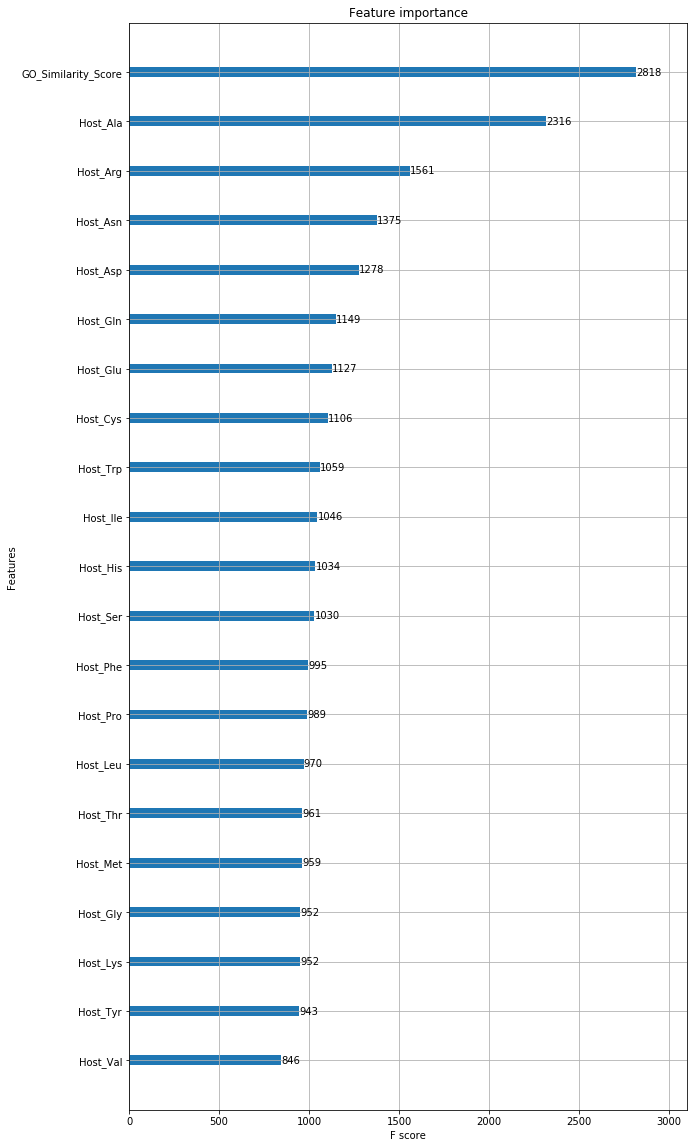

In [32]:
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param = {'silent':1}
num_round = 500
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()